<a href="https://colab.research.google.com/github/vsr87/Projeto-Estatistica/blob/main/Projeto_de_Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Perfil de Cliente

## Entendimento do Negócio

O marketing de um banco realizou uma campanha de 3 meses em todo o Brasil para vender um produto de investimento, selecionando clientes específicos. Após a campanha, a área de Analytics recebeu a base de dados para analisar o perfil dos clientes. O objetivo é identificar o público mais propenso a comprar títulos e investimentos (a informação sobre a compra está na coluna 'Cliente_Comprou_o_Titulo?'), para direcionar futuras campanhas.

Sua tarefa como Analista de Dados é realizar uma análise exploratória sobre aspectos como idade, profissão, estado civil, formação, crédito, e uso de hipoteca e empréstimo, e gerar um relatório com insights claros e traduzidos para a linguagem de negócios.

## Dicionário de Colunas

### Colunas numéricas (int64):
- **Saldo_Conta_Corrente**: Saldo atual do cliente na conta corrente.
- **Qte_de_Ligações_Feitas**: Número de ligações feitas para o cliente durante a campanha.
-  **Idade**: Idade do cliente.

### Colunas categóricas (object):
- **Cliente_Comprou_o_Titulo?**: Indica se o cliente comprou o produto de investimento (Sim/Não).
- **Profissão**: Profissão do cliente (e.g., Operário, Administrador, Aposentado).
- **Estado_Civil**: Estado civil do cliente (e.g., Solteiro, Casado).
- **Formação**: Nível de escolaridade do cliente (e.g., Ensino Médio, Ensino Superior).
- **Cliente_Devedor?**: Indica se o cliente tem uma dívida registrada (Sim/Não).
- **Tem_Hipoteca?**: Indica se o cliente possui uma hipoteca (Sim/Não).
- **Tem_Emprestimo?**: Indica se o cliente possui um empréstimo (Sim/Não).


## Importando a Base e as Bibliotecas

In [ ]:
# Importando as Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
uploaded = files.upload()
base = pd.read_excel("bank_marketing.xlsx", header=1)

Saving bank_marketing.xlsx to bank_marketing.xlsx


## Entendimento dos Dados

Nesta primeira etapa do CRISP-DM, é importante entender os dados disponíveis para o projeto. Isso envolve conhecer as informações, verificar se estão corretas e identificar padrões iniciais. Esse processo ajuda a preparar os dados para as próximas fases da análise

In [ ]:
# Verificando o tamanho da base de dados
base.shape

(9684, 11)

Temos 9684 linhas (clientes) e 10 colunas

In [ ]:
# Verificando a base de dados
base.head(10)

,Unnamed: 0,Cliente_Comprou_o_Titulo?,Idade,Profissão,Estado_Civil,Formação,Cliente_Devedor?,Saldo_Conta_Corrente,Tem_Hipoteca?,Tem_Emprestimo?,Qte_de_Ligações_Feitas
0,NaN,Não,33,Operário,Casado,Ensino Médio,Não,263,Sim,Não,3
1,NaN,Não,58,Aposentado,Casado,Ensino Médio,Não,19,Não,Sim,3
2,NaN,Sim,83,Aposentado,Casado,Fundamental,Não,425,Não,Não,1
3,NaN,Sim,32,Administrador,Solteiro,Ensino Superior,Não,10281,Não,Não,1
4,NaN,Sim,31,Administrador,Solteiro,Ensino Médio,Não,360,Sim,Não,1
5,NaN,Sim,66,Aposentado,Casado,Fundamental,Não,2883,Não,Não,1
6,NaN,Sim,34,Técnico,Casado,Ensino Médio,Não,294,Sim,Não,3
7,NaN,Não,35,Operário,Casado,Ensino Médio,Não,74,Não,Não,2
8,NaN,Não,55,Administrador,Casado,Ensino Superior,Não,1161,Sim,Não,6
9,NaN,Sim,53,Administrador,Divorciado,Ensino Médio,Não,1004,Não,Sim,1


**OBS**: Percebemos a existência de uma coluna com dados faltantes que necessita de um tratamento. Vamos conferir se esse padrão se extende para todas as linhas na etapa de 'Tratamento'.

Agora vamos verificar alguns dados estatísticos das colunas numéricas.

In [ ]:
# Verificando informações da base final
base.describe()

,Unnamed: 0,Idade,Saldo_Conta_Corrente,Qte_de_Ligações_Feitas
count,0.0,9684.000000,9684.000000,9684.000000
mean,NaN,41.235130,1706.046881,2.463445
std,NaN,12.110432,2749.931890,2.630583
min,NaN,18.000000,1.000000,1.000000
25%,NaN,32.000000,258.000000,1.000000
50%,NaN,38.000000,728.000000,2.000000
75%,NaN,49.000000,2007.000000,3.000000
max,NaN,95.000000,29340.000000,63.000000


## Preparação dos Dados (Tratamento)

Na etapa de Preparação dos Dados do CRISP-DM, os dados são organizados e tratados para garantir que estejam prontos para análise. Isso inclui limpar dados incorretos ou faltantes, transformar informações em formatos adequados, e selecionar as variáveis mais importantes para o projeto.

In [ ]:
# Verificando dados nulos
base.isnull().sum()

,0
Unnamed: 0,9684
Cliente_Comprou_o_Titulo?,0
Idade,0
Profissão,0
Estado_Civil,0
Formação,0
Cliente_Devedor?,0
Saldo_Conta_Corrente,0
Tem_Hipoteca?,0
Tem_Emprestimo?,0


**OBS**: Verificamos que todas as linhas dessa coluna possuem valores faltantes. Então, vamos optar por excluir essa coluna.

In [ ]:
# Excluindo a primeira coluna (índice 0)
base = base.drop(base.columns[0], axis=1)

In [ ]:
# Verificando informações da base final e conferindo a exclusão da coluna 'Unnamed'
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9684 entries, 0 to 9683
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Cliente_Comprou_o_Titulo?  9684 non-null   object
 1   Idade                      9684 non-null   int64 
 2   Profissão                  9684 non-null   object
 3   Estado_Civil               9684 non-null   object
 4   Formação                   9684 non-null   object
 5   Cliente_Devedor?           9684 non-null   object
 6   Saldo_Conta_Corrente       9684 non-null   int64 
 7   Tem_Hipoteca?              9684 non-null   object
 8   Tem_Emprestimo?            9684 non-null   object
 9   Qte_de_Ligações_Feitas     9684 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 756.7+ KB


## Análise dos Dados

A etapa de análise dos dados na metodologia CRISP-DM envolve a exploração e visualização dos dados para identificar padrões e tendências. Técnicas estatísticas e análises descritivas ajudam a entender as relações entre variáveis e validar hipóteses.

### Análise da coluna 'Hipoteca'

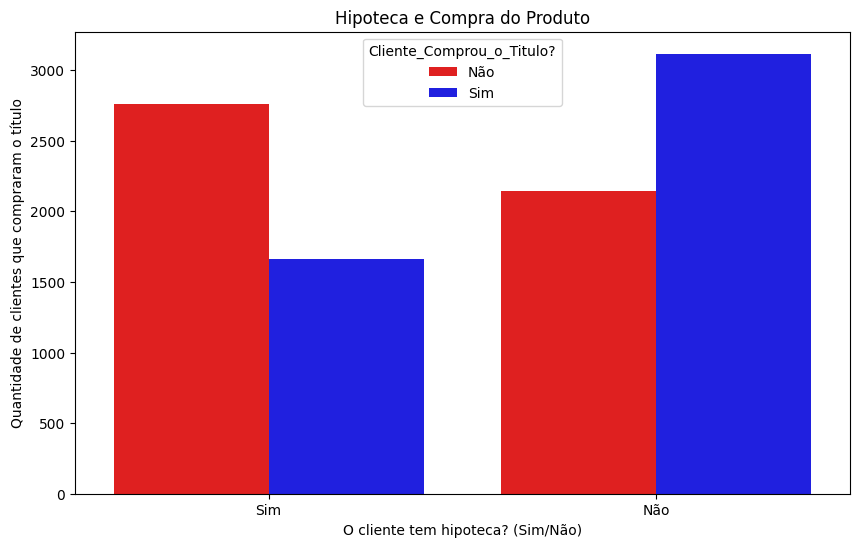

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=base, x="Tem_Hipoteca?", hue="Cliente_Comprou_o_Titulo?", palette={"Sim": "blue", "Não": "red"})
plt.title("Hipoteca e Compra do Produto")
plt.xlabel("O cliente tem hipoteca? (Sim/Não)")
plt.ylabel("Quantidade de clientes que compraram o título")
plt.show()


**INSIGHT**: Observa-se que clientes sem hipoteca apresentam uma probabilidade significativamente maior de realizar compras, tanto em termos absolutos quanto em porcentagem em relação àqueles que possuem hipoteca. Portanto, é recomendável direcionar campanhas de marketing especificamente para esse segmento de clientes sem hipoteca, a fim de maximizar as oportunidades de vendas e engajamento.

### Análise da coluna 'Qte_de_Ligações_Feitas'

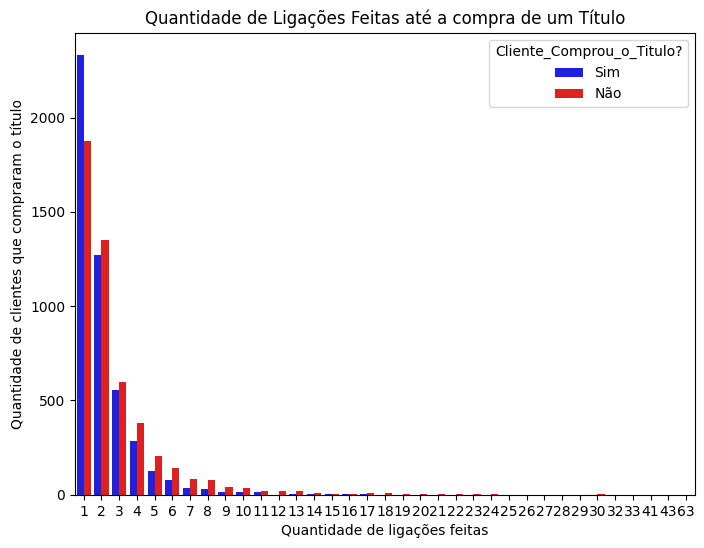

In [ ]:
# Gráfico 3: Quantidade de ligações feitas por cliente que comprou ou não o título
plt.figure(figsize=(8, 6))
sns.countplot(x="Qte_de_Ligações_Feitas", hue="Cliente_Comprou_o_Titulo?", data=base, palette={"Sim": "blue", "Não": "red"})
plt.title('Quantidade de Ligações Feitas até a compra de um Título')
plt.xlabel("Quantidade de ligações feitas")
plt.ylabel("Quantidade de clientes que compraram o título")
plt.show()


**INSIGHT**: Nota-se que, a partir da sexta ligação, o número de conversões diminui consideravelmente. Isso indica um desperdício de recursos, já que os profissionais envolvidos nas ligações estão investindo tempo em clientes que apresentam baixa probabilidade de conversão. Assim, recomenda-se estabelecer um limite de cerca de seis ligações por cliente, permitindo um direcionamento mais eficaz da equipe de vendas e priorizando o contato com clientes que estão mais propensos a realizar a compra nas primeiras interações.

### Análise do quantitativo de comprantes em relação ao estado civil

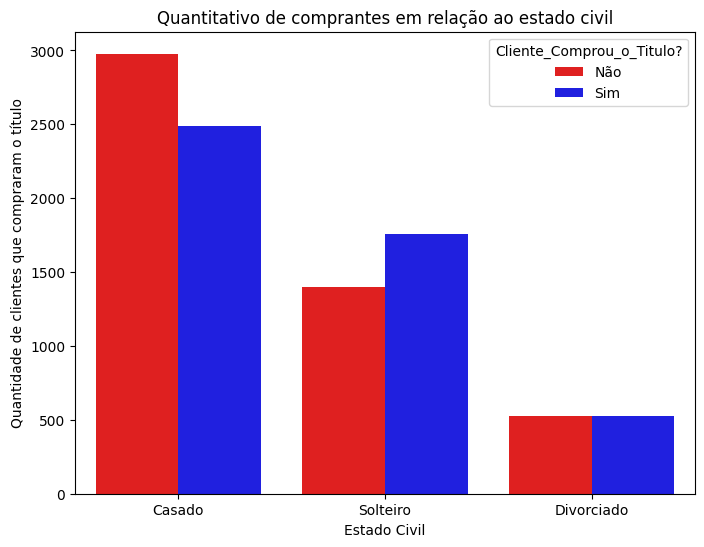

In [ ]:
# Gráfico 4: quantitativo de comprantes em relação ao estado civil
plt.figure(figsize=(8, 6))
sns.countplot(x="Estado_Civil", hue="Cliente_Comprou_o_Titulo?", data=base, palette={"Sim": "blue", "Não": "red"})
plt.title('Quantitativo de comprantes em relação ao estado civil')
plt.xlabel("Estado Civil")
plt.ylabel("Quantidade de clientes que compraram o título")
plt.show()

**INSIGHT:** A partir do gráfico, podemos notar que a taxa de não compra entre os casados é significativamente alta. Assim, é recomendado explorar por que tantos casados não compram. Isso pode ser devido a prioridades financeiras (como compra de imóveis, educação de filhos) ou falta de conhecimento sobre investimentos. Estratégias de marketing poderiam ser adaptadas para abordar essas preocupações e destacar como o investimento pode complementar seu planejamento financeiro familiar.

Além disso, nota-se que os solteiros têm uma boa taxa de compra, o que indica que têm maior disposição para assumir riscos financeiros ou estão mais abertos a investir. Assim, esse grupo pode ser um alvo promissor para campanhas que enfatizam a construção de patrimônio e a independência financeira. O marketing pode explorar a ideia de que investimentos são uma forma de alcançar objetivos pessoais, como viajar, adquirir bens ou garantir uma aposentadoria confortável.

Por fim, nota-se que a taxa de compra e não compra dos divorciados é equilibrada, o que indica que esse grupo pode estar em transição ou reavaliando suas situações financeiras após a separação. Assim, campanhas que abordam a reestruturação financeira após um divórcio podem ressoar bem com os divorciados. Oferecer informações sobre como os investimentos podem ajudar a construir uma nova segurança financeira ou proporcionar estabilidade durante períodos de mudança pode ser atraente.

### Análise do quantitativo de comprantes em relação à profissão

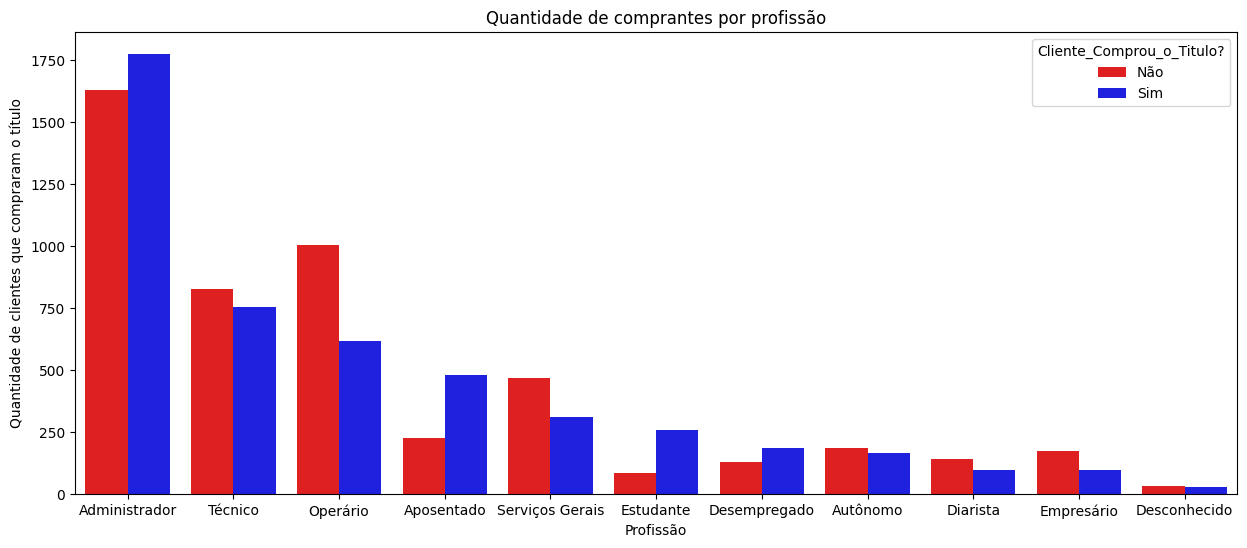

In [ ]:
# Gráfico 5: Quantidade de comprantes por profissão

profissao_order = base[base["Cliente_Comprou_o_Titulo?"] == "Sim"]["Profissão"].value_counts().index

plt.figure(figsize=(15, 6))
sns.countplot(
    x="Profissão",
    hue="Cliente_Comprou_o_Titulo?",
    data=base,
    order=profissao_order,  # Ordenação do maior para o menor número de comprantes
    palette={"Sim": "blue", "Não": "red"}
)
plt.title('Quantidade de comprantes por profissão')
plt.xlabel("Profissão")
plt.ylabel("Quantidade de clientes que compraram o título")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenando as profissões com base na quantidade de compradores (quem comprou o título)
profissao_order = base[base["Cliente_Comprou_o_Titulo?"] == "Sim"]["Profissão"].value_counts().index

# Contando a quantidade total de compradores por profissão
comprantes_por_profissao = base[base["Cliente_Comprou_o_Titulo?"] == "Sim"].groupby("Profissão").size()

# Contando o total de clientes por profissão (incluindo quem não comprou)
total_por_profissao = base.groupby("Profissão").size()

# Calculando os percentuais de compradores por profissão
percentuais_comprantes = (comprantes_por_profissao / total_por_profissao) * 100

# Imprimindo os percentuais de compradores por profissão
print("Percentual de compradores por profissão:")
for profissao, percentual in percentuais_comprantes.items():
    print(f"{profissao}: {percentual:.2f}%")




Percentual de compradores por profissão:
Administrador: 52.12%
Aposentado: 67.85%
Autônomo: 47.32%
Desconhecido: 47.62%
Desempregado: 58.99%
Diarista: 41.25%
Empresário: 35.90%
Estudante: 75.00%
Operário: 38.12%
Serviços Gerais: 40.08%
Técnico: 47.72%


**INSIGHT:** A partir dessa análise, podemos concluir que há perfis profissionais com maior interesse de compra do título ou com maiores condições financeiras para comprá-lo. São eles: administrador, técnico, operário, aposentados, serviços gerais e estudante. Assim, essas profissões com alta taxa de compra indicam grupos prioritários para campanhas futuras, pois já demonstram interesse no produto. Além disso, é recomendado personalizar essas campanhas para profissões específicas com mensagens que estajam de acordo com seus interesses e estilos de vida para aumentar a taxa de conversão, já que algumas dessas profissões também têm uma alta quantidade de não comprantes.

Realizando uma análise mais específica da classe mais compradora, os administradores, nota-se que representam um dos públicos-alvo mais significativos para o banco. Como administradores tendem a ter maior estabilidade financeira e conhecimento sobre produtos financeiros, sua propensão a compra é mais consistente. Assim, as campanhas para eles poderiam destacar o produto de investimento como parte de uma estratégia de crescimento financeiro, possivelmente oferecendo pacotes de investimento voltados para profissionais que buscam diversificação e crescimento.

### Análise de clientes devedores

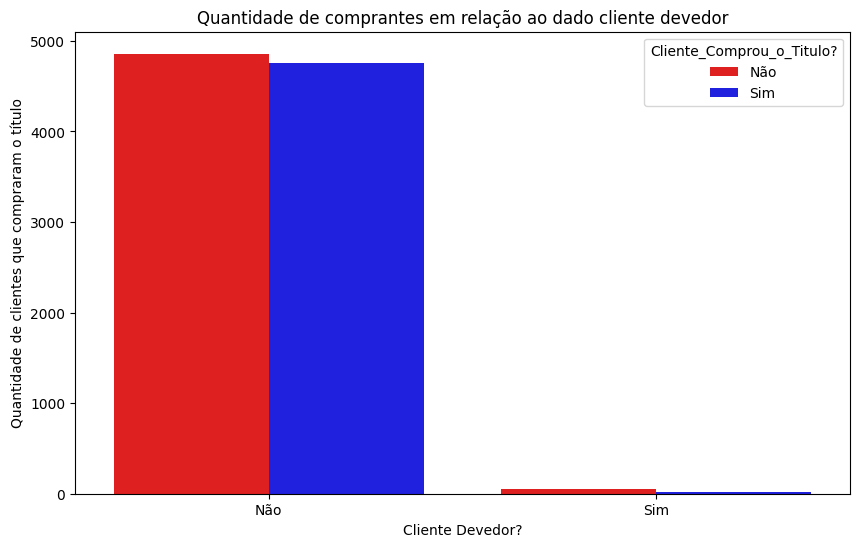

In [ ]:
# Gráfico 6: Quantidade de comprantes em relação ao fato de se deve ou não
plt.figure(figsize=(10, 6))
sns.countplot(x="Cliente_Devedor?", hue="Cliente_Comprou_o_Titulo?", data=base, palette={"Sim": "blue", "Não": "red"})
plt.title('Quantidade de comprantes em relação ao dado cliente devedor')
plt.xlabel("Cliente Devedor?")
plt.ylabel("Quantidade de clientes que compraram o título")
plt.show()


**INSIGHT:** A partir dessa análise, podemos concluir que a diferença entre clientes devedores e não devedores demonstra que a estabilidade financeira é um fator imprescindível na decisão de comprar o título. Assim, é recomendado que as campanhas devem priorizar clientes não devedores, que estão mais preparados financeiramente e têm maior probabilidade de comprar o título, enquanto campanhas educativas podem ser uma estratégia de suporte para clientes devedores visando um investimento no título em longo prazo.

### Análise dos compradores em relação ao fato de ter empréstimo ou não



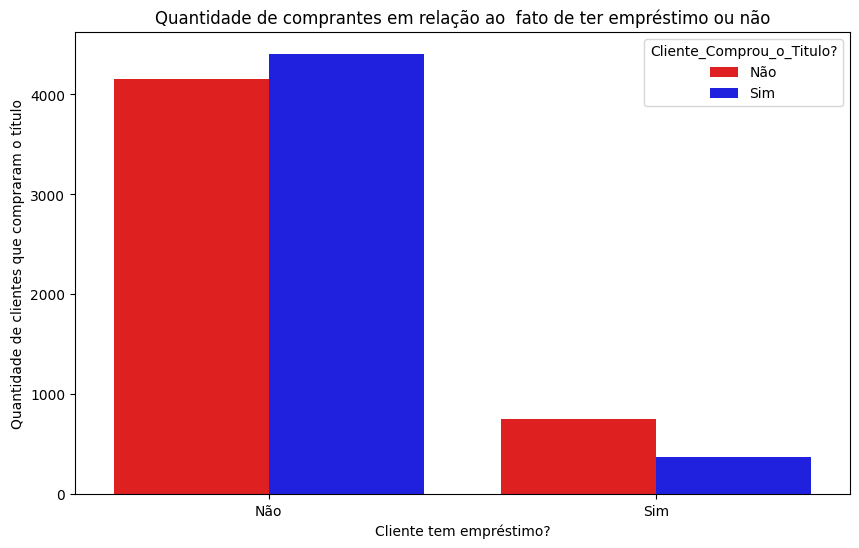

In [ ]:
# Gráfico 7: Quantidade de comprantes em relação ao fato de se deve ou não
plt.figure(figsize=(10, 6))
sns.countplot(x="Tem_Emprestimo?", hue="Cliente_Comprou_o_Titulo?", data=base, palette={"Sim": "blue", "Não": "red"})
plt.title('Quantidade de comprantes em relação ao  fato de ter empréstimo ou não')
plt.xlabel("Cliente tem empréstimo?")
plt.ylabel("Quantidade de clientes que compraram o título")
plt.show()

**INSIGHT:** A partir dessa análise, a presença ou ausência de empréstimos é um fator considerável na propensão dos clientes para investimentos. Assim, é recomendado que campanhas de investimento devem priorizar clientes sem empréstimos, enquanto os clientes com empréstimos poderiam ser beneficiados por conteúdos educativos e estratégias de planejamento financeiro. Dessa forma, o banco pode maximizar o retorno de suas campanhas, engajando clientes mais preparados para investir e, ao mesmo tempo, apoiando o planejamento financeiro daqueles que ainda não estão prontos.

### Análise dos comprantes em relação ao saldo na conta

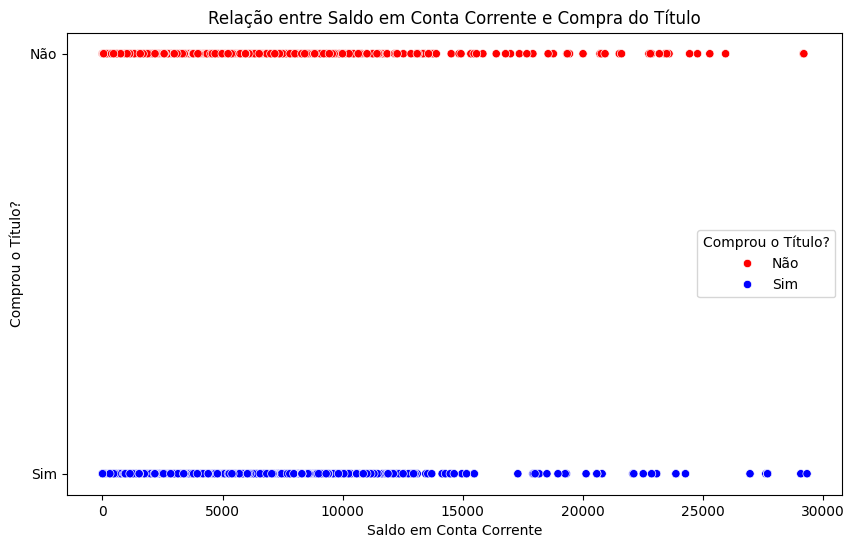

In [ ]:
# Gráfico 8: relação entre saldo e compra do título
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Saldo_Conta_Corrente', y='Cliente_Comprou_o_Titulo?', data=base, hue='Cliente_Comprou_o_Titulo?', palette={"Sim": "blue", "Não": "red"})
plt.title("Relação entre Saldo em Conta Corrente e Compra do Título")
plt.xlabel("Saldo em Conta Corrente")
plt.ylabel("Comprou o Título?")
plt.legend(title="Comprou o Título?")
plt.show()


**INISHGT:** A partir dessa análise, conclui-se que a faixa de saldo desempenha um papel importante na decisão de compra. Assim, são recomendadas que sejam realizadas campanhas focadas em clientes com saldos moderados, visto que eles têm mais chances de sucesso, enquanto aqueles com saldo alto podem exigir produtos financeiros mais robustos para captar seu interesse, ampliando o engajamento entre diferentes perfis financeiros.

### Análise dos compradores em relação à formação

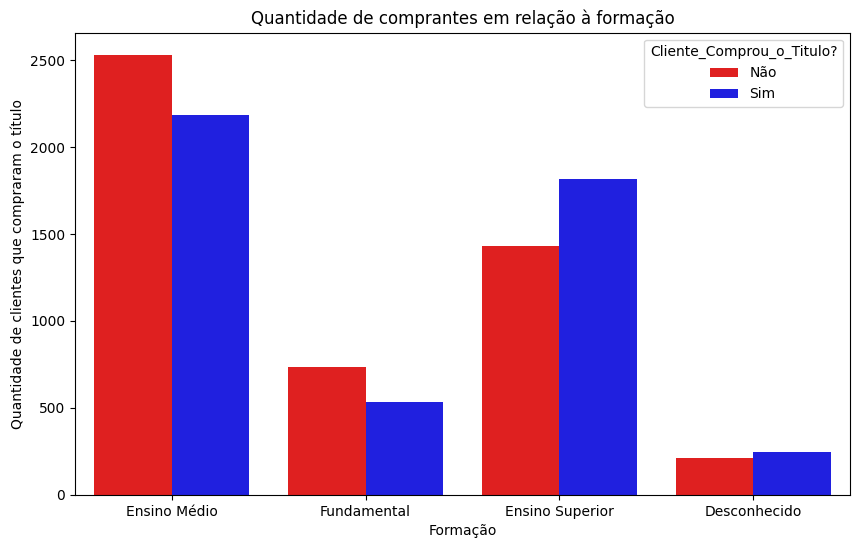

In [ ]:
# Gráfico 9: Quantidade de comprantes em relação ao fato de se deve ou não
plt.figure(figsize=(10, 6))
sns.countplot(x="Formação", hue="Cliente_Comprou_o_Titulo?", data=base, palette={"Sim": "blue", "Não": "red"})
plt.title('Quantidade de comprantes em relação à formação')
plt.xlabel("Formação")
plt.ylabel("Quantidade de clientes que compraram o título")
plt.show()


**INSIGHT:** A partir dessa análise, pode-se concluir que a maior propensão de compra entre clientes com ensino médio completo e ensino superior completo indica que um nível educacional mais alto pode estar associado a uma maior conscientização sobre a importância de investimentos para o futuro financeiro. Assim, campanhas de marketing podem se beneficiar ao promover o título para esse grupo, focando em como o investimento se encaixa em um plano financeiro de longo prazo e em objetivos de vida importantes e reforçando a importância do planejamento financeiro e os benefícios de investir desde cedo.

Além disso, nota-se que a menor propensão de compra entre clientes com ensino fundamental sugere que parte do público pode ter menos conhecimento ou confiança em investimentos, o que aponta para uma oportunidade de capacitar clientes com menos familiaridade sobre o tema, aumentando o entendimento sobre os benefícios do título e, consequentemente, atraindo-os para o investimento. Assim, uma abordagem educacional, com conteúdos que expliquem os conceitos básicos de investimento e seu impacto no futuro financeiro, poderia ajudar a expandir o mercado. Realizar workshops, disponibilizar materiais informativos e utilizar redes sociais para simplificar o tema pode atrair clientes de diferentes perfis educacionais e estimular o interesse em investir.

## Análise de compradores em relação à idade

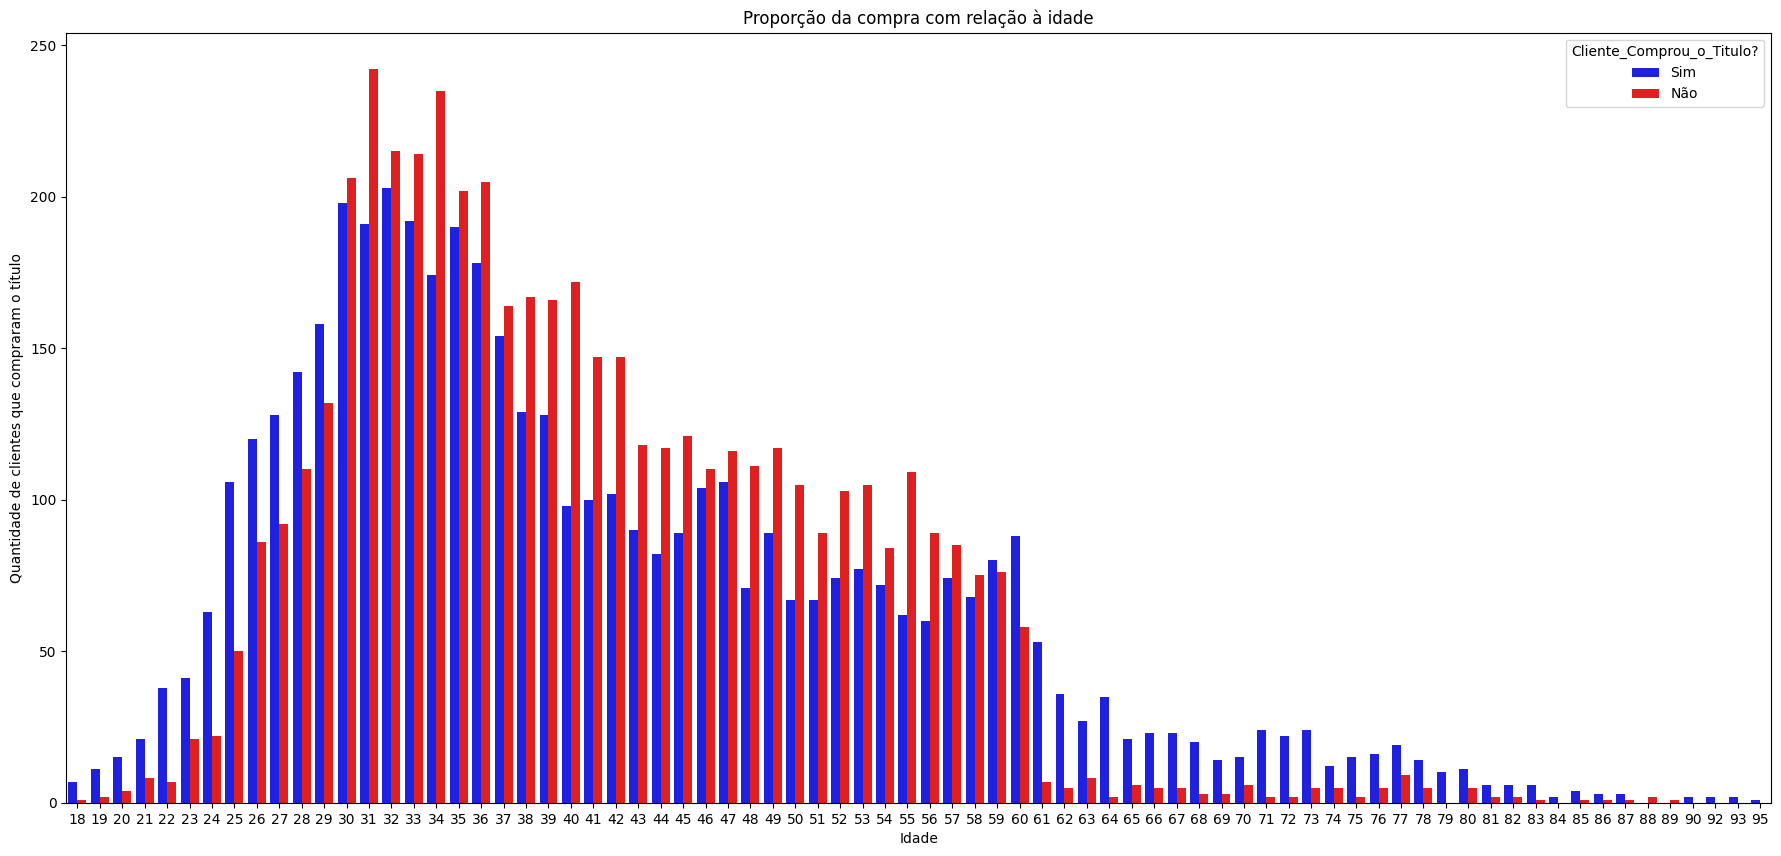

In [ ]:
# Gráfico 10: Quantidade de comprantes em relação à idade

plt.figure(figsize=(22, 10))
sns.countplot(data=base, x="Idade", hue="Cliente_Comprou_o_Titulo?", palette={"Sim": "blue", "Não": "red"})
plt.title("Proporção da compra com relação à idade")
plt.xlabel("Idade")
plt.ylabel("Quantidade de clientes que compraram o título")
plt.show()


A partir dessa análise, podemos concluir que clientes da faixa etária de 25 a 40 anos estão entre os maiores compradores. Essa faixa etária representa um grupo que geralmente busca consolidar a estabilidade financeira e planejar o futuro. Esse grupo está em um estágio de vida onde o interesse em produtos de investimento é elevado, seja para o crescimento patrimonial, aposentadoria, ou projetos de longo prazo. Nesse sentido, é recomendado que campanhas futuras destaquem como o produto de investimento contribui para a segurança financeira e o crescimento pessoal (algo que é valorizado por essa faixa etária), além de promover o investimento como o início de uma relação financeira com o banco.


### Análise dos compradores na faixa etária entre 25 e 40 anos em relação à profissão

In [ ]:
# Gráfico 11: Calcular a proporção de compra por profissão na faixa etária entre 25 e 40 anos

# Filtrar os clientes entre 25 e 40 anos
clientes_25_40 = base[(base['Idade'] >= 25) & (base['Idade'] <= 40)]

# Primeiro, agrupar por profissão e contagem de "Cliente_Comprou_o_Titulo?"
compradores_por_profissao = clientes_25_40.groupby(['Profissão', 'Cliente_Comprou_o_Titulo?']).size().unstack(fill_value=0)

# Calcular a proporção de compra para cada profissão
compradores_por_profissao['Proporção de Compra'] = compradores_por_profissao['Sim'] / (compradores_por_profissao['Sim'] + compradores_por_profissao['Não'])

# Ordenar pelo nível de propensão, do maior para o menor
compradores_por_profissao = compradores_por_profissao.sort_values(by='Proporção de Compra', ascending=False)

# Exibir o resultado
print("Profissões mais propensas a comprar o título entre clientes de 25 a 40 anos:")
print(compradores_por_profissao[['Sim', 'Não', 'Proporção de Compra']])

Profissões mais propensas a comprar o título entre clientes de 25 a 40 anos:
Cliente_Comprou_o_Titulo?   Sim  Não  Proporção de Compra
Profissão                                                
Estudante                   143   58             0.711443
Desempregado                101   67             0.601190
Administrador              1036  950             0.521652
Autônomo                    107  105             0.504717
Desconhecido                  7    7             0.500000
Técnico                     475  509             0.482724
Serviços Gerais             203  295             0.407631
Operário                    345  538             0.390713
Diarista                     27   44             0.380282
Empresário                   44   79             0.357724
Aposentado                    1    6             0.142857


**INISHGT:** A partir dessa análise, podemos notar que, embora não sejam considerados perfis tradicionais de investidores, como foi analisado anteriormente, estudantes (71,1%) e desempregados (60,1%) apresentam uma alta propensão de compra, talvez por estarem em busca de crescimento financeiro e segurança para o futuro. Assim, são recomendadas campanhas direcionadas para esses grupos, o que pode enfatizar como os investimentos podem ajudar a garantir segurança financeira e oportunidades para crescimento patrimonial, mesmo para quem está em início de carreira ou em transição.

## Análise do perfil ideal de cliente (ICP) baseada nos clientes administradores (profissão mais comprante)

### Análise da faixa etária dos compradores administradores

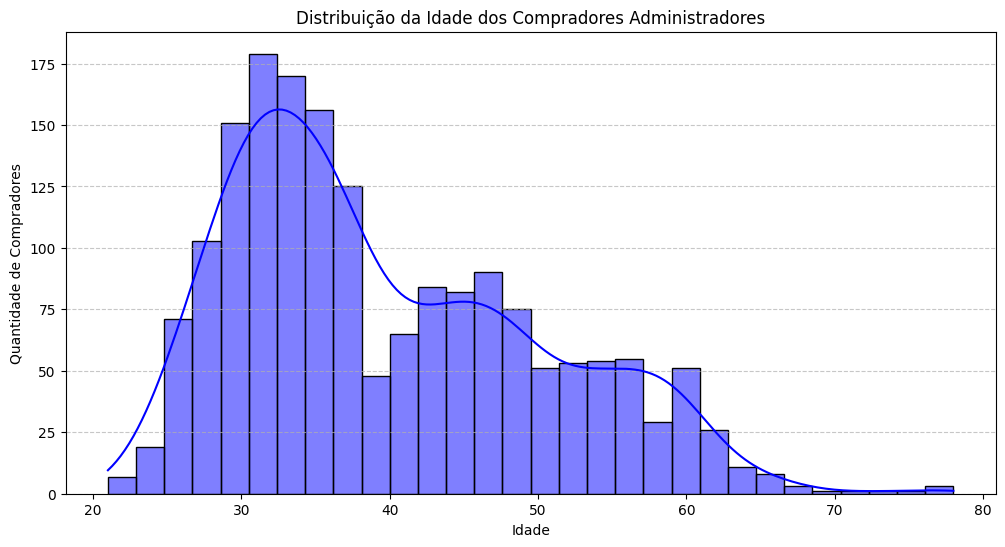

In [ ]:
# Filtra apenas os administradores que compraram o título
admin_compradores = base[(base['Profissão'] == 'Administrador') & (base['Cliente_Comprou_o_Titulo?'] == 'Sim')]

plt.figure(figsize=(12, 6))
sns.histplot(admin_compradores['Idade'], bins=30, kde=True, color='blue')
plt.title('Distribuição da Idade dos Compradores Administradores')
plt.xlabel('Idade')
plt.ylabel('Quantidade de Compradores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Análise dos compradores administradores em relação ao saldo corrente

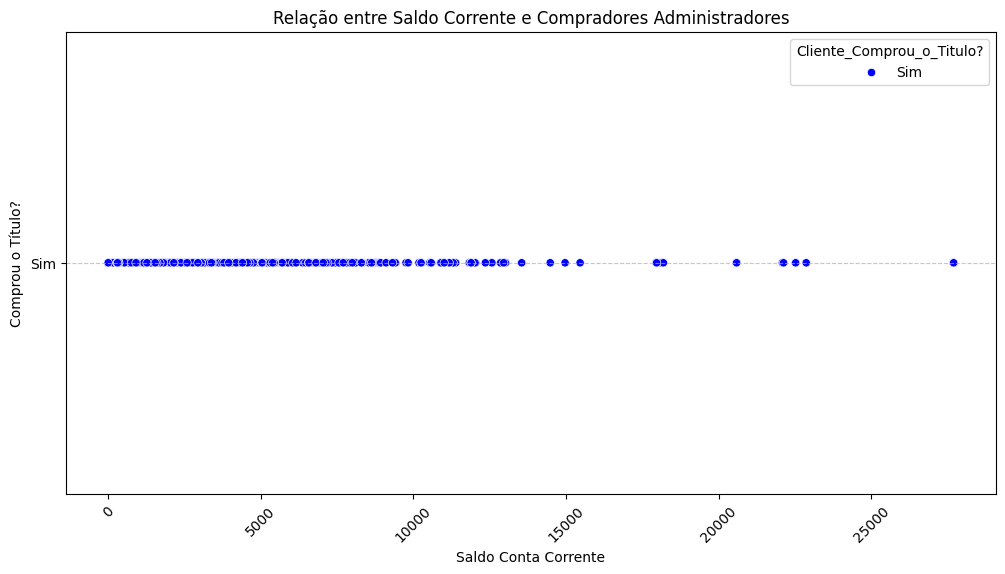

In [ ]:
# Filtra apenas os administradores que compraram o título
admin_compradores = base[(base['Profissão'] == 'Administrador') & (base['Cliente_Comprou_o_Titulo?'] == 'Sim')]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Saldo_Conta_Corrente', y='Cliente_Comprou_o_Titulo?', data=admin_compradores, hue='Cliente_Comprou_o_Titulo?', palette={"Sim": "blue", "Não": "red"})
plt.title('Relação entre Saldo Corrente e Compradores Administradores')
plt.xlabel('Saldo Conta Corrente')
plt.ylabel('Comprou o Título?')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Análise dos compradores administradore em relação à hipoteca

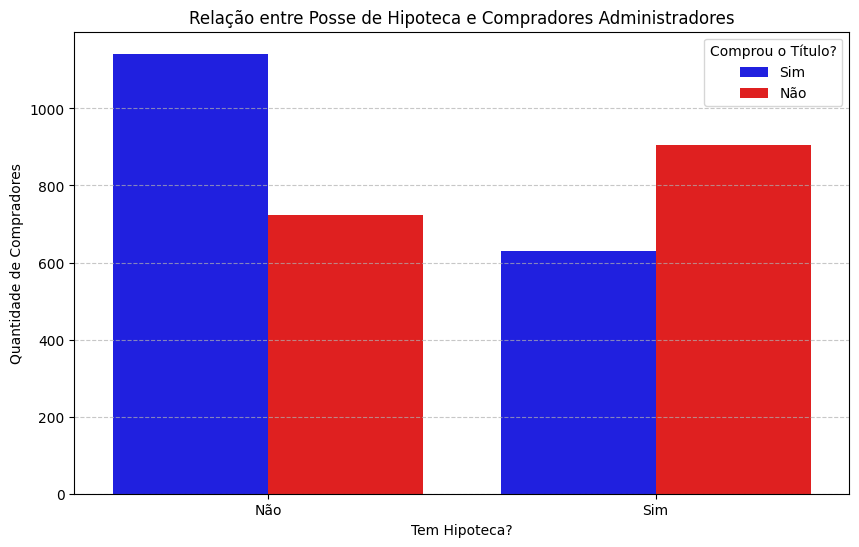

In [ ]:
# Filtra apenas os administradores
admin_data = base[base['Profissão'] == 'Administrador']

plt.figure(figsize=(10, 6))
sns.countplot(x='Tem_Hipoteca?', hue='Cliente_Comprou_o_Titulo?', data=admin_data, palette={"Sim": "blue", "Não": "red"})
plt.title('Relação entre Posse de Hipoteca e Compradores Administradores')
plt.xlabel('Tem Hipoteca?')
plt.ylabel('Quantidade de Compradores')
plt.legend(title='Comprou o Título?', loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Análise dos compradores administradores em relação à ser devedor

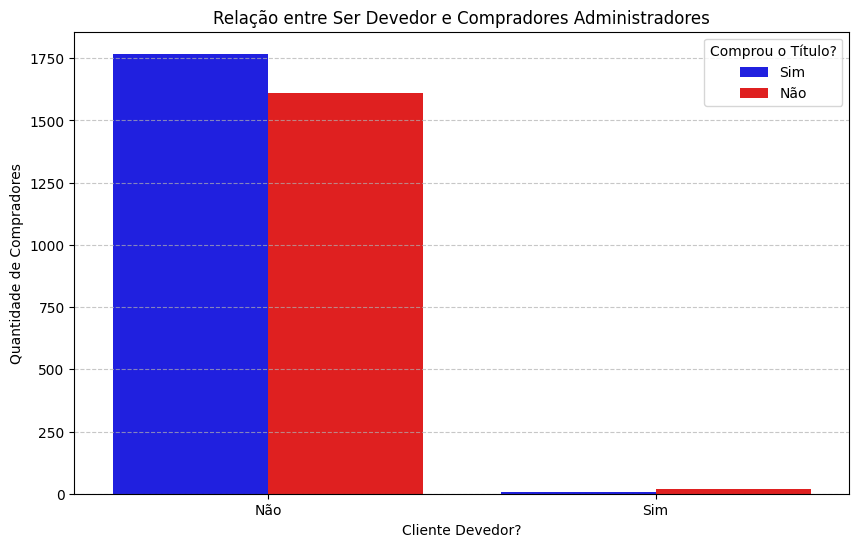

In [ ]:
# Filtra apenas os administradores
admin_data = base[base['Profissão'] == 'Administrador']

plt.figure(figsize=(10, 6))
sns.countplot(x='Cliente_Devedor?', hue='Cliente_Comprou_o_Titulo?', data=admin_data, palette={"Sim": "blue", "Não": "red"})
plt.title('Relação entre Ser Devedor e Compradores Administradores')
plt.xlabel('Cliente Devedor?')
plt.ylabel('Quantidade de Compradores')
plt.legend(title='Comprou o Título?', loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Análise dos compradores administradore em relação à se tem empréstimo ou não

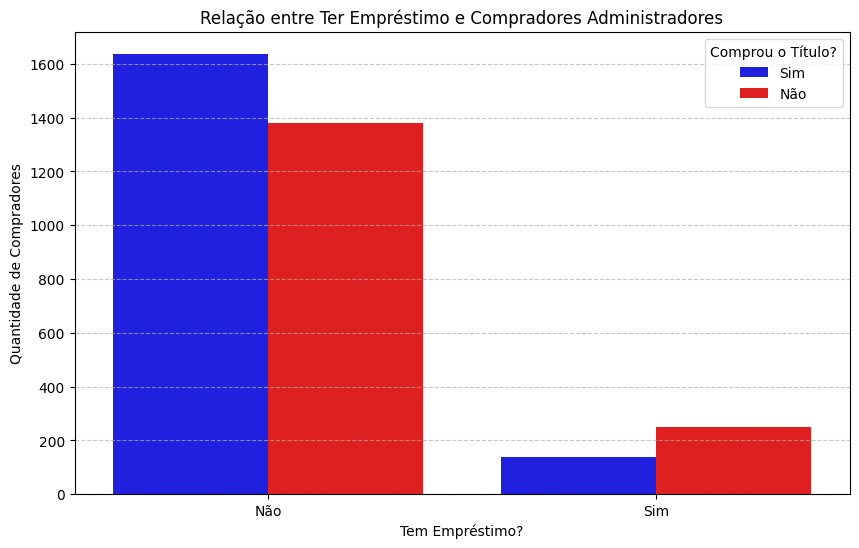

In [ ]:
# Filtra apenas os administradores
admin_data = base[base['Profissão'] == 'Administrador']

plt.figure(figsize=(10, 6))
sns.countplot(x='Tem_Emprestimo?', hue='Cliente_Comprou_o_Titulo?', data=admin_data, palette={"Sim": "blue", "Não": "red"})
plt.title('Relação entre Ter Empréstimo e Compradores Administradores')
plt.xlabel('Tem Empréstimo?')
plt.ylabel('Quantidade de Compradores')
plt.legend(title='Comprou o Título?', loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Análise dos compradores administradore em relação à quantidade de ligações feitas

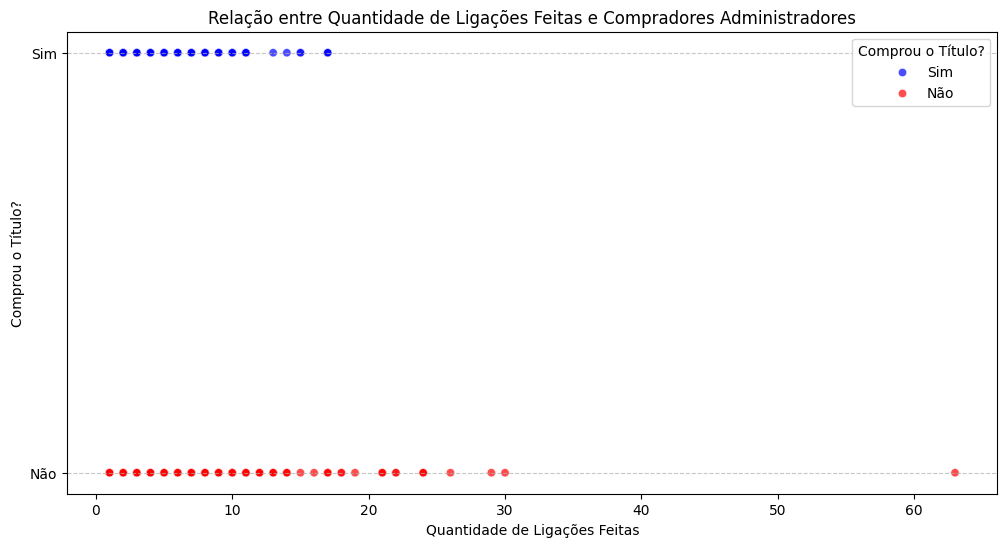

In [ ]:
# Filtra apenas os administradores
admin_data = base[base['Profissão'] == 'Administrador']

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Qte_de_Ligações_Feitas', y='Cliente_Comprou_o_Titulo?', data=admin_data, hue='Cliente_Comprou_o_Titulo?', palette={"Sim": "blue", "Não": "red"}, alpha=0.7)
plt.title('Relação entre Quantidade de Ligações Feitas e Compradores Administradores')
plt.xlabel('Quantidade de Ligações Feitas')
plt.ylabel('Comprou o Título?')
plt.legend(title='Comprou o Título?', loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**CONCLUSÃO E INSIGHT DO CLIENTE ICP:** a partir dessa análise, podemos inferir que o cliente ICP é um administrador com faixa etária de 25 a 40 anos, cuja maioria tem um saldo de até R$ 15.000, não possuem hipoteca, não é devedora, não tem empréstimos e com baixa quantidade de ligações para compra do título. Assim, o perfil identificado pode ajudar a moldar futuras campanhas de marketing. Além disso, focar em administradores entre 25 e 40 anos com um saldo corrente modesto pode ser uma abordagem eficaz. Isso pode incluir ofertas personalizadas que abordem suas necessidades específicas de investimento. Dado que muitos administradores têm um perfil financeiro conservador (sem dívidas ou hipotecas), iniciativas de educação financeira podem ser implementadas para orientá-los sobre a importância de investir, como maximizar seu saldo e explorar opções de investimentos que se alinhem a seus objetivos financeiros, incentivando, consequetemente, a compra do título. Por fim, com base na correlação entre a quantidade de ligações e a conversão de vendas, as equipes de vendas e marketing devem considerar estratégias para otimizar o número de contatos e a qualidade das interações. Por exemplo, personalizar as abordagens de comunicação e utilizar insights dos clientes pode aumentar a eficácia das ligações.

# Implementação do Classificador Ingênuo de Bayes

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import numpy as np

# Carregar os dados corretamente (removendo índices extras)
df = pd.read_excel("bank_marketing.xlsx", header=1)

# Remover a coluna "Unnamed: 0" caso exista
df.drop(columns=["Unnamed: 0"], errors="ignore", inplace=True)

# Renomear a coluna-alvo corretamente
df.rename(columns={"Cliente_Comprou_o_Titulo?": "Alvo"}, inplace=True)

# Converter colunas numéricas corretamente
num_cols = ["Idade", "Saldo_Conta_Corrente", "Qte_de_Ligações_Feitas"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Transformar variáveis categóricas
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separar variáveis independentes e dependentes
X = df.drop(columns=["Alvo"])
y = df["Alvo"]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = GaussianNB()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
print(classification_report(y_test, y_pred))

# Importância das variáveis (baseada na média das probabilidades)
feature_importance = np.abs(model.theta_[1] - model.theta_[0])
importance_sum = np.sum(feature_importance)

# Normalizar para que a soma seja exatamente 100%
importance_percentage = (feature_importance / importance_sum) * 100
importance_percentage[-1] += 100 - np.sum(importance_percentage)

# Ordenar as variáveis por importância
importance_ranking = sorted(zip(X.columns, importance_percentage, model.theta_[1]), key=lambda x: x[1], reverse=True)

# Exibir os resultados com colunas alinhadas
print("\nRanking de Importância das Variáveis:")
print("+------+--------------------------+-------------+----------------------+" )
print("| Rank | Variável                 | Importância | Valor Mais Influente |")
print("+------+--------------------------+-------------+----------------------+" )
for idx, (feature, importance, value) in enumerate(importance_ranking, start=1):
    original_value = value
    if feature in label_encoders:
        original_value = label_encoders[feature].inverse_transform([int(value)])[0]
    print(f"| {idx:^4} | {feature:<24} | {importance:>10.2f}% | {str(original_value):<20} |")
print("+------+--------------------------+-------------+----------------------+" )

# Criar perfil do cliente ideal com os valores que maximizam a aceitação
df_positive = df[df['Alvo'] == 1]
ideal_profile = {}
for col in X.columns:
    if col in label_encoders:
        ideal_profile[col] = label_encoders[col].inverse_transform([int(df_positive[col].mode()[0])])[0]
    else:
        ideal_profile[col] = int(df_positive[col].mean()) if df_positive[col].dtype in [np.int64, np.float64] else df_positive[col].mode()[0]

print("\nPerfil do Cliente Ideal:")
for key, value in ideal_profile.items():
    print(f"{key}: {value}")


              precision    recall  f1-score   support

           0       0.66      0.40      0.50       957
           1       0.58      0.79      0.67       980

    accuracy                           0.60      1937
   macro avg       0.62      0.60      0.58      1937
weighted avg       0.62      0.60      0.58      1937


Ranking de Importância das Variáveis:
+------+--------------------------+-------------+----------------------+
| Rank | Variável                 | Importância | Valor Mais Influente |
+------+--------------------------+-------------+----------------------+
|  1   | Saldo_Conta_Corrente     |      99.40% | 1941.6732490784623   |
|  2   | Idade                    |       0.19% | 41.661927330173775   |
|  3   | Profissão                |       0.16% | Desempregado         |
|  4   | Qte_de_Ligações_Feitas   |       0.15% | 2.1113744075829386   |
|  5   | Tem_Hipoteca?            |       0.05% | Não                  |
|  6   | Estado_Civil             |       0.04% | 

 # Experimentos


# Comparação de Modelos

Vamos comparar o nosso modelo Naive Bayes com o modelo de Support Vector Classifier e o Random Forest;


Naive Bayes:
              precision    recall  f1-score   support

           0       0.66      0.40      0.50       957
           1       0.58      0.79      0.67       980

    accuracy                           0.60      1937
   macro avg       0.62      0.60      0.58      1937
weighted avg       0.62      0.60      0.58      1937


Random Forest:
              precision    recall  f1-score   support

           0       0.61      0.66      0.63       957
           1       0.64      0.58      0.61       980

    accuracy                           0.62      1937
   macro avg       0.62      0.62      0.62      1937
weighted avg       0.62      0.62      0.62      1937


SVM:
              precision    recall  f1-score   support

           0       0.53      0.74      0.62       957
           1       0.59      0.37      0.45       980

    accuracy                           0.55      1937
   macro avg       0.56      0.55      0.54      1937
weighted avg       0.56      0.55     

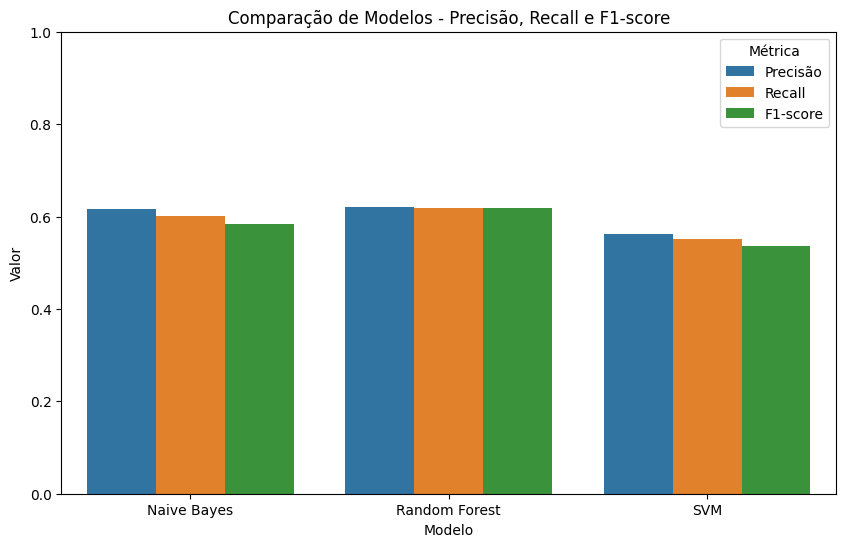

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Carregar os dados corretamente
df = pd.read_excel("bank_marketing.xlsx", header=1)

# Remover a coluna "Unnamed: 0" caso exista
df.drop(columns=["Unnamed: 0"], errors="ignore", inplace=True)

# Renomear a coluna-alvo corretamente
df.rename(columns={"Cliente_Comprou_o_Titulo?": "Alvo"}, inplace=True)

# Converter colunas numéricas
num_cols = ["Idade", "Saldo_Conta_Corrente", "Qte_de_Ligações_Feitas"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Transformar variáveis categóricas
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separar variáveis independentes e dependentes
X = df.drop(columns=["Alvo"])
y = df["Alvo"]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e avaliar diferentes modelos
models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Armazenar resultados
results = []

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "Modelo": name,
        "Precisão": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-score": report["weighted avg"]["f1-score"]
    })

    print(f"\n{name}:")
    print(classification_report(y_test, y_pred))

# Criar DataFrame com os resultados
df_results = pd.DataFrame(results)

# Plotar gráfico de comparação
plt.figure(figsize=(10, 6))
sns.barplot(x="Modelo", y="value", hue="variable", data=pd.melt(df_results, ["Modelo"]))
plt.title("Comparação de Modelos - Precisão, Recall e F1-score")
plt.ylabel("Valor")
plt.xlabel("Modelo")
plt.ylim(0, 1)
plt.legend(title="Métrica")
plt.show()


# Diferentes proporções de treino e teste

Testar diferentes proporções para observar o impacto no desempenho


Resultados da Avaliação:
 Proporção Treino  Acurácia NB
              0.5     0.595209
              0.6     0.594218
              0.7     0.592567
              0.8     0.600413
              0.9     0.604747


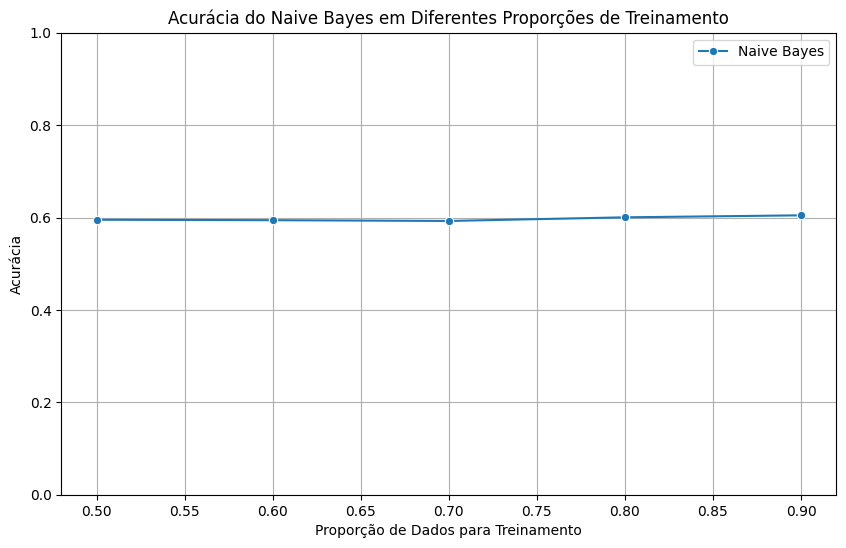

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Carregar os dados corretamente
df = pd.read_excel("bank_marketing.xlsx", header=1)

# Remover a coluna "Unnamed: 0" caso exista
df.drop(columns=["Unnamed: 0"], errors="ignore", inplace=True)

# Renomear a coluna-alvo corretamente
df.rename(columns={"Cliente_Comprou_o_Titulo?": "Alvo"}, inplace=True)

# Converter colunas numéricas corretamente
num_cols = ["Idade", "Saldo_Conta_Corrente", "Qte_de_Ligações_Feitas"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Transformar variáveis categóricas
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separar variáveis independentes e dependentes
X = df.drop(columns=["Alvo"])
y = df["Alvo"]

# Proporções de treino a serem testadas
train_sizes = [0.5, 0.6, 0.7, 0.8, 0.9]

# Dicionário para armazenar os resultados
results = []

for train_size in train_sizes:
    test_size = 1 - train_size

    # Dividir os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Treinar o modelo Naive Bayes
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    y_pred_nb = nb_model.predict(X_test)
    nb_accuracy = accuracy_score(y_test, y_pred_nb)

    # Armazenar os resultados
    results.append([train_size, nb_accuracy])

# Criar DataFrame para exibir os resultados
results_df = pd.DataFrame(results, columns=["Proporção Treino", "Acurácia NB"])

# Exibir os resultados formatados
print("\nResultados da Avaliação:")
print(results_df.to_string(index=False))

# Plotar gráfico de comparação
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x="Proporção Treino", y="Acurácia NB", marker="o", label="Naive Bayes")
plt.title("Acurácia do Naive Bayes em Diferentes Proporções de Treinamento")
plt.xlabel("Proporção de Dados para Treinamento")
plt.ylabel("Acurácia")
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()


# Teste de Normalização das Variáveis

Testar a normalização das variáveis serve para avaliar o impacto da escala dos dados no desempenho do modelo.


Impacto da Normalização no Desempenho do Naive Bayes:
    Normalização  Acurácia NB
Sem Normalização     0.600413
  StandardScaler     0.583893
    MinMaxScaler     0.583893


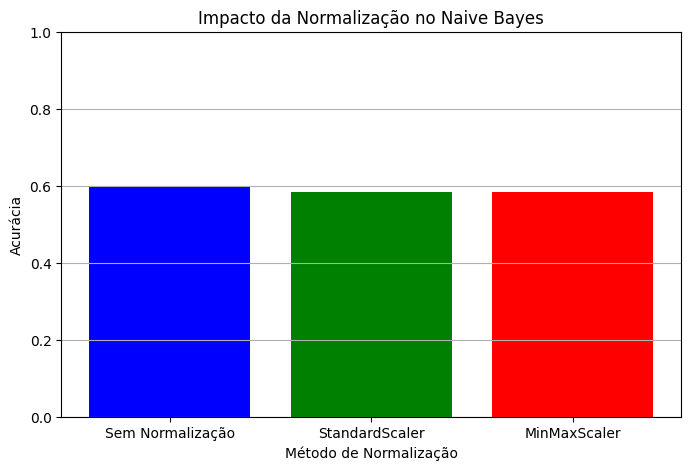

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Carregar os dados corretamente (removendo índices extras)
df = pd.read_excel("bank_marketing.xlsx", header=1)

# Remover a coluna "Unnamed: 0" caso exista
df.drop(columns=["Unnamed: 0"], errors="ignore", inplace=True)

# Renomear a coluna-alvo corretamente
df.rename(columns={"Cliente_Comprou_o_Titulo?": "Alvo"}, inplace=True)

# Converter colunas numéricas corretamente
num_cols = ["Idade", "Saldo_Conta_Corrente", "Qte_de_Ligações_Feitas"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Transformar variáveis categóricas
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separar variáveis independentes e dependentes
X = df.drop(columns=["Alvo"])
y = df["Alvo"]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizações a serem testadas
normalizations = {
    "Sem Normalização": X_train,
    "StandardScaler": StandardScaler().fit_transform(X_train),
    "MinMaxScaler": MinMaxScaler().fit_transform(X_train)
}

# Dicionário para armazenar os resultados
results = []

for norm_type, X_train_norm in normalizations.items():
    # Normalizar o conjunto de teste com a mesma transformação
    if norm_type == "Sem Normalização":
        X_test_norm = X_test
    else:
        scaler = StandardScaler() if norm_type == "StandardScaler" else MinMaxScaler()
        X_test_norm = scaler.fit(X_train).transform(X_test)

    # Treinar o modelo Naive Bayes
    model = GaussianNB()
    model.fit(X_train_norm, y_train)

    # Fazer previsões
    y_pred = model.predict(X_test_norm)

    # Calcular acurácia
    accuracy = accuracy_score(y_test, y_pred)

    # Armazenar os resultados
    results.append([norm_type, accuracy])

# Criar DataFrame para exibir os resultados
results_df = pd.DataFrame(results, columns=["Normalização", "Acurácia NB"])

# Exibir os resultados formatados
print("\nImpacto da Normalização no Desempenho do Naive Bayes:")
print(results_df.to_string(index=False))

# Gráfico comparativo
plt.figure(figsize=(8, 5))
x_labels = results_df["Normalização"]
plt.bar(x_labels, results_df["Acurácia NB"], color=["blue", "green", "red"])
plt.xlabel("Método de Normalização")
plt.ylabel("Acurácia")
plt.title("Impacto da Normalização no Naive Bayes")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()
